# 単語のベクトル化（Word2Vec）Demo

## 学習済みモデルロード
東北大学「日本語 Wikipedia エンティティベクトル」を使用（Wikipediaデータから各単語を200次元のベクトルに変換）

http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/

In [1]:
from gensim.models import KeyedVectors
model_dir = './entity_vector.model.bin'
model = KeyedVectors.load_word2vec_format(model_dir, binary=True)

C:\Users\hkawaguc.ZENYAKU\AppData\Local\conda\conda\envs\TensorFlow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## キーワードの類似性

In [4]:
results = model.most_similar(u'[ヤマハ]')
for result in results:
    print(result)

('[ローランド]', 0.8267862796783447)
('[コルグ]', 0.810291051864624)
('[河合楽器製作所]', 0.8038392066955566)
('ヤマハ', 0.800750732421875)
('[電子オルガン]', 0.7601752877235413)
('[イーエスピー]', 0.754939079284668)
('[フェンダー_(楽器メーカー)]', 0.731192946434021)
('[ギブソン_(楽器メーカー)]', 0.7309705018997192)
('[電子ピアノ]', 0.7279394865036011)
('[シンセサイザー]', 0.7247918844223022)


## キーワードの引き算

In [6]:
results = model.most_similar( positive=[u'[悪魔]'], negative=[u'[悪]'] )
for result in results:
    print(result)

('[ミッキーマウス]', 0.49913734197616577)
('ディズニーキャラクター', 0.48958778381347656)
('[ディズニーキャラクター]', 0.4716237783432007)
('[ミニーマウス]', 0.42842090129852295)
('パペット', 0.4260064661502838)
('[妖精]', 0.4153487980365753)
('[ゴエティア]', 0.4150884747505188)
('[海賊_(ONE_PIECE)]', 0.4051780104637146)
('[アラジン_(映画)]', 0.403739869594574)
('[道化師]', 0.3985579311847687)


## キーワードの足し算

In [7]:
results = model.most_similar(positive=[u'[公務員]',u'[ピストル]'])
for result in results:
    print(result)

('[警察官]', 0.7124896049499512)
('[日本の警察官]', 0.7051844596862793)
('[警棒]', 0.6932262182235718)
('[拳銃]', 0.6676812767982483)
('[刑務官]', 0.6608917713165283)
('警察官', 0.6491464376449585)
('[自衛隊員]', 0.6456712484359741)
('[警察]', 0.628797173500061)
('拳銃', 0.6269474029541016)
('[催涙スプレー]', 0.6268929243087769)


In [8]:
# シンボルグラウンディング問題は解決できていない！
results = model.most_similar(positive=[u'[ウマ]',u'[シマ]'])
for result in results:
    print(result)

('[馬]', 0.6204228401184082)
('[シルヴァーロックス]', 0.6161380410194397)
('[アジャックス_(フランスの競走馬)]', 0.6112329363822937)
('[ヤシマヒメ]', 0.6083375215530396)
('Matchem', 0.607103705406189)
('サヤジラオ', 0.6050207614898682)
('[ガウル]', 0.603990375995636)
('[チョーサー_(競走馬)]', 0.6036167144775391)
('スカンダ', 0.6015855073928833)
('[スゲヌマ]', 0.6009383797645569)


## キーワードの足し算と引き算

In [9]:
# 王子 - 男性 + 女性
results = model.most_similar(positive=[u'[王子]',u'[女性]'],negative=[u'[男性]'])
for result in results:
    print(result)

('[王女]', 0.7265908718109131)
('[姫]', 0.7074600458145142)
('姫君', 0.702674388885498)
('[女王]', 0.6836342215538025)
('お姫様', 0.6642835140228271)
('王女', 0.6590272188186646)
('王子', 0.6532903909683228)
('花嫁', 0.6499365568161011)
('姫', 0.6368809342384338)
('巫女', 0.6357200145721436)


In [10]:
results = model.most_similar(positive=[u'[イチロー]',u'[サッカー]'],negative=[u'[野球]'])
for result in results:
    print(result)

('[ロナウド]', 0.6781752109527588)
('[ジネディーヌ・ジダン]', 0.6686527729034424)
('[中田英寿]', 0.6643422842025757)
('[ジーコ]', 0.6631736755371094)
('[ロベルト・バッジョ]', 0.6589246988296509)
('[ロナウジーニョ]', 0.6574504971504211)
('[ディエゴ・マラドーナ]', 0.653502881526947)
('ジダン', 0.6474758982658386)
('[デビッド・ベッカム]', 0.6473382115364075)
('[三浦知良]', 0.6451823711395264)


In [11]:
results = model.most_similar(positive=[u'[札幌市]',u'[沖縄県]'],negative=[u'[北海道]'])
for result in results:
    print(result)

('[那覇市]', 0.773338794708252)
('[宜野湾市]', 0.6969374418258667)
('[沖縄市]', 0.6933772563934326)
('[石垣市]', 0.6681679487228394)
('[名護市]', 0.6610418558120728)
('[浦添市]', 0.6533352136611938)
('沖縄県', 0.6339038610458374)
('沖縄', 0.6273850202560425)
('[読谷村]', 0.6153493523597717)
('[与那国町]', 0.6127915382385254)


## ベクトルの相関確認

In [3]:
import numpy as np

vec1 = model.get_vector(u'[指原莉乃]')
vec2 = model.get_vector(u'[前田敦子]')
vec3 = model.get_vector(u'[宮本武蔵]')

vec = ([vec1,vec2,vec3])

np.corrcoef(vec)

array([[1.        , 0.85255582, 0.1222748 ],
       [0.85255582, 1.        , 0.13319373],
       [0.1222748 , 0.13319373, 1.        ]])

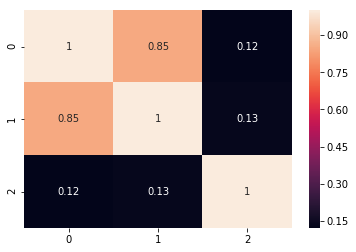

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(np.corrcoef(vec), annot=True)
plt.show()

In [10]:
print(vec)

[array([ 2.21691430e-01,  1.32206574e-01,  1.54414728e-01, -2.24024013e-01,
        8.47462058e-01,  7.39864826e-01, -6.31341934e-02,  3.80206406e-01,
        3.82986158e-01, -3.77583057e-01, -7.20299959e-01,  6.27653956e-01,
        2.56285876e-01, -4.42581892e-01,  7.44888857e-02, -2.04210639e-01,
        2.27550417e-01,  5.18167503e-02,  1.67106405e-01, -2.57733464e-01,
       -1.58100113e-01,  8.39592889e-02, -3.18659008e-01, -6.87253416e-01,
        1.33277848e-01, -1.92485347e-01, -7.49655545e-01, -5.20537138e-01,
       -7.14955032e-01,  1.37426212e-01, -5.18898070e-01,  6.70810223e-01,
        2.96362519e-01,  4.15812224e-01,  3.72573882e-01, -3.83090794e-01,
       -7.24613309e-01, -8.14161524e-02,  1.10331826e-01, -3.64824474e-01,
        3.71725336e-02, -2.85809427e-01, -2.67145097e-01,  4.03124958e-01,
       -1.76277235e-01,  1.70610949e-01,  1.41204044e-01,  2.12029442e-01,
       -5.30039847e-01,  8.82967934e-02, -2.29818508e-01, -1.86903685e-01,
       -1.61767393e-01, 